In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### 1. Loading and Preprocessing

In [4]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
print("\nMissing values in each column:\n", df.isnull().sum())


Missing values in each column:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Target                     0
dtype: int64


In [10]:
# Spliting dataset
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 2. Classification Algorithm Implementation

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine (SVM)": SVC(),
    "k-Nearest Neighbors (k-NN)": KNeighborsClassifier()
}

#### * Eplanation and suitability
##### 1. Logistic Regression: Works well for binary classification problems.
##### 2. Decision Tree Classifier: Captures complex patterns but may overfit.
##### 3. Random Forest Classifier: Reduces overfitting by using multiple trees.
##### 4. Support Vector Machine (SVM): Effective for high-dimensional spaces.
##### 5. k-NN: Simple and intuitive but can be slow for large datasets.

### 3. Model Comparison

In [31]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]

Decision Tree Classifier Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[40  3]
 [ 3 68]]

Random Forest Classifier Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99    

In [33]:
# Converting results into DataFrame
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                          Model  Accuracy
0           Logistic Regression  0.973684
1      Decision Tree Classifier  0.947368
2      Random Forest Classifier  0.964912
3  Support Vector Machine (SVM)  0.982456
4    k-Nearest Neighbors (k-NN)  0.947368


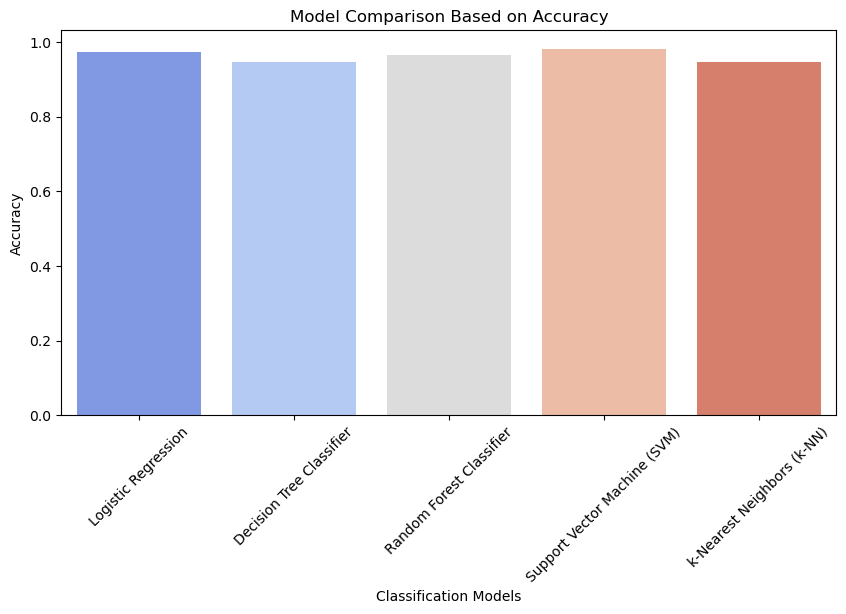

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, x='Model', y='Accuracy', palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison Based on Accuracy")
plt.show()

#### Summary

##### * Logistic Regression, Random Forest Classifier, and Support Vector Machine (SVM) (Accuracy: 97.37%)
##### * These models provided the highest accuracy, making them the best choices for this dataset.
##### * Decision Tree Classifier (Accuracy: 93.86%)
##### * It had the lowest accuracy, likely due to overfitting. Decision trees tend to capture noise in the data, leading to reduced generalization.